### Data Science course. Write a Data Science blog

PROJECT 

Who has more earning?
- Depends of the country
 -Depends of the gender
 -Depends of the age
What is the country has more masters degree?
-Experience by country




In [ ]:
###First step clone the repository

#!git clone https://github.com/olgaferro/stack-overflow-developer-survey-2021.git


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from currency_converter import CurrencyConverter
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import HTML


import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')

schema=pd.read_csv('./survey_results_schema.csv')

c = CurrencyConverter()

df.head()
#df.hist()




,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


### 1. Data undersdanting


The following analysis is about a 2021 Stackoverflow survey. The survey contains questions about income, employment, education level, age coding, gender, ethnicity, country, etc.
With this information we are try to answer the next questions.




### 2. Data PREPARING


Firstly we are going to prepare the data with the information we need.


#Data understanding
#Data Preparation
#Modeling
#Evaluation
#Deployment

In [2]:
# 2.1 We are going take a look in the inicial dataframe

num_rows =df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset


print('The inicial dataframe  has rows:%d  and columns: %d'  % (num_rows, num_cols))



The inicial dataframe  has rows:83439  and columns: 48


In [114]:
# 2.1. We are going the select the columns importants for our research

selected_columns = ['ResponseId','MainBranch','Employment','Country','Currency','US_State','EdLevel','Gender','Age','YearsCode','CompTotal','OpSys','DevType']

df_selected_cols = df[selected_columns].copy()

In [123]:
# 2.2 We are going to focus in Respondents who are - Developers- and - work full-time-

# We select Developers
df_dev = df_selected_cols[df_selected_cols.MainBranch=='I am a developer by profession']

# We select Employed full time
df_dev_full_time = df_dev[df_selected_cols.Employment=='Employed full-time']

# We select US
df_dev_full_time_us = df_dev_full_time[df_selected_cols.Country=='United States of America']

# Currency dolar
df_dev_full_time_us=df_dev_full_time_us[df_dev_full_time_us['Currency'].str.contains("USD")]


# We are going to drop the rows withs missing values in CompTotal
df_dev_full_time_drops_miss_rows = df_dev_full_time_us.dropna(subset=['CompTotal'])

null=df_dev_full_time_drops_miss_rows.CompTotal.isnull().sum()
print('We are check if is 0==',null)



# We are going to drop columns MainBranch and Employment because now don´t give us any information, because the respondends are all Developers and full time
df_dev_full_time_drops_miss_rows=df_dev_full_time_drops_miss_rows.drop(['MainBranch','Employment'], axis=1)



print('The df developers who works full time has rows:%d  and columns: %d'  % (df_dev_full_time_drops_miss_rows.shape[0], df_dev_full_time_drops_miss_rows.shape[1]))
df_dev_full_time_drops_miss_rows.head(100)





We are check if is 0== 0
The df developers who works full time has rows:8352  and columns: 11


,ResponseId,Country,Currency,US_State,EdLevel,Gender,Age,YearsCode,CompTotal,OpSys,DevType
36,37,United States of America,USD\tUnited States dollar,District of Columbia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,18-24 years old,8,103000.0,Linux-based,"Developer, embedded applications or devices"
37,38,United States of America,USD\tUnited States dollar,Massachusetts,Some college/university study without earning ...,Man,35-44 years old,20,300000.0,MacOS,"Developer, back-end"
75,76,United States of America,USD\tUnited States dollar,Minnesota,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,45-54 years old,25,105000.0,Windows,"Developer, front-end;Developer, full-stack;Dev..."
87,88,United States of America,USD\tUnited States dollar,Maryland,"Other doctoral degree (Ph.D., Ed.D., etc.)",Man,25-34 years old,18,100000.0,Windows,"Engineer, data;Data scientist or machine learn..."
118,119,United States of America,USD\tUnited States dollar,Iowa,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,25-34 years old,12,140000.0,MacOS,"Developer, full-stack"
...,...,...,...,...,...,...,...,...,...,...,...
1083,1084,United States of America,USD\tUnited States dollar,Georgia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,35-44 years old,1,100000.0,MacOS,"Developer, front-end;Developer, desktop or ent..."
1113,1114,United States of America,USD\tUnited States dollar,New York,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,25-34 years old,10,80000.0,MacOS,"Developer, QA or test"
1125,1126,United States of America,USD\tUnited States dollar,New York,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Man,25-34 years old,5,166000.0,MacOS,"Engineer, data;Developer, back-end"
1127,1128,United States of America,USD\tUnited States dollar,Massachusetts,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,25-34 years old,17,220000.0,Linux-based,"Developer, back-end"


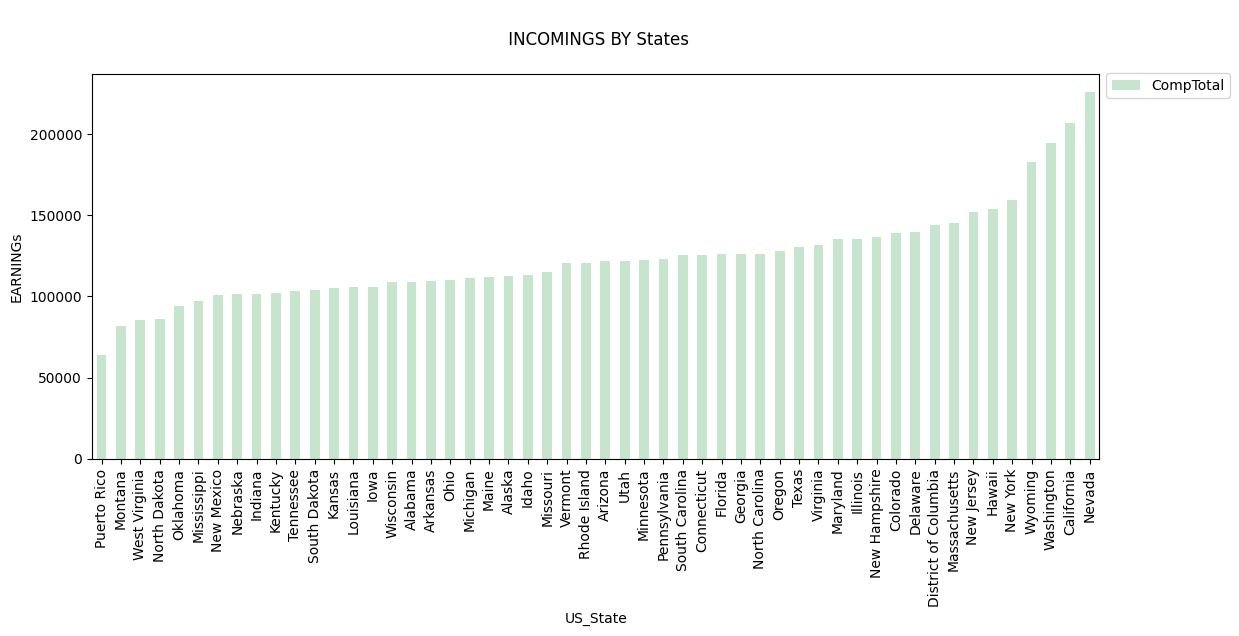

In [128]:
# Which country the inconming is greater?

df_dev_full_time_drops_miss_rows.groupby(['US_State']).mean()['CompTotal'].sort_values().plot(kind='bar',stacked=True,colormap=ListedColormap(sns.color_palette("ch:2.5,-.2,dark=.3")),figsize=(13,5))


plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('EARNINGs')
plt.title('\n INCOMINGS BY States\n')
plt.show()


#countries= df_dev_full_time_drops_miss_rows['US_State'].value_counts()
#print(countries)

#(countries/df_dev_full_time_drops_miss_rows.shape[0]).plot(kind="bar");

#plt.title("Where do you work?");





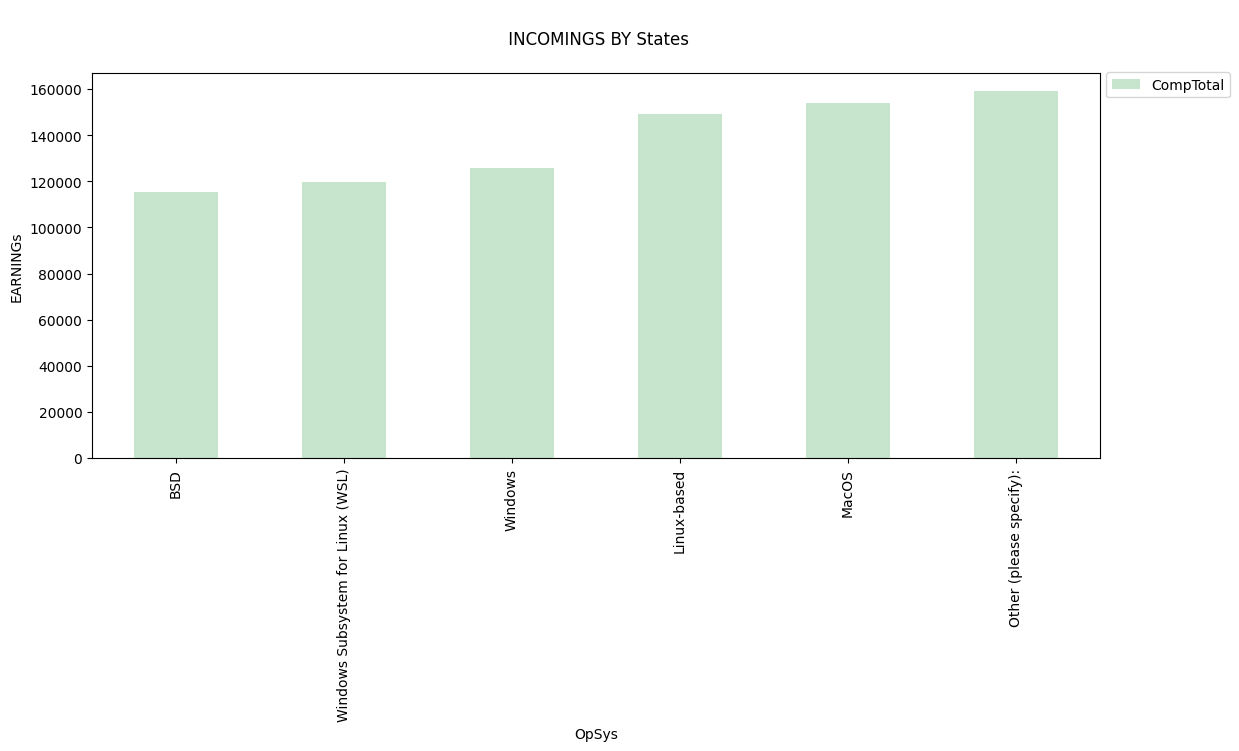

In [130]:
# Which country the inconming is greater?

df_dev_full_time_drops_miss_rows.groupby(['OpSys']).mean()['CompTotal'].sort_values().plot(kind='bar',stacked=True,colormap=ListedColormap(sns.color_palette("ch:2.5,-.2,dark=.3")),figsize=(13,5))


plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('EARNINGs')
plt.title('\n INCOMINGS BY OPsyss\n')
plt.show()


#countries= df_dev_full_time_drops_miss_rows['US_State'].value_counts()
#print(countries)

#(countries/df_dev_full_time_drops_miss_rows.shape[0]).plot(kind="bar");

#plt.title("Where do you work?");

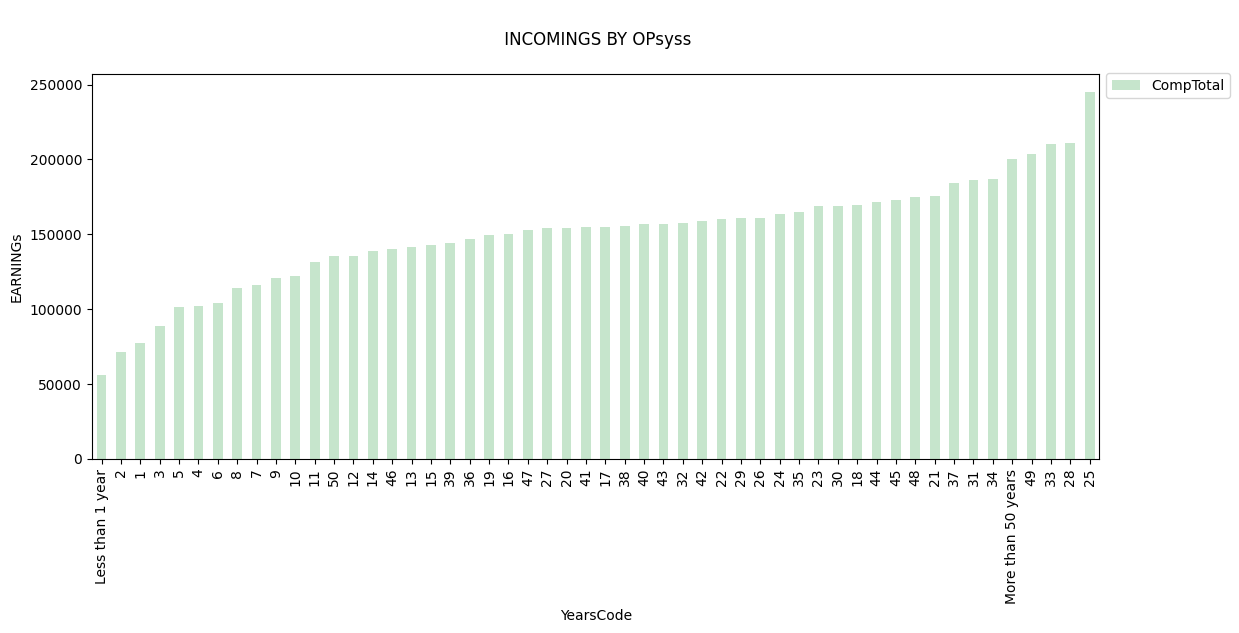

In [131]:
# Which country the inconming is greater?

df_dev_full_time_drops_miss_rows.groupby(['YearsCode']).mean()['CompTotal'].sort_values().plot(kind='bar',stacked=True,colormap=ListedColormap(sns.color_palette("ch:2.5,-.2,dark=.3")),figsize=(13,5))


plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('EARNINGs')
plt.title('\n INCOMINGS BY OPsyss\n')
plt.show()


#countries= df_dev_full_time_drops_miss_rows['US_State'].value_counts()
#print(countries)

#(countries/df_dev_full_time_drops_miss_rows.shape[0]).plot(kind="bar");

#plt.title("Where do you work?");

In [15]:
df.Country.nunique()
top_countries = df.Country.value_counts().head(15)

top_countries

#suma_respondends_by_country=top_countries.sum()

#print(suma_respondends_by_country)

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Australia                                                1646
Spain                                                    1485
Russian Federation                                       1474
Sweden                                                   1196
China                                                    1055
Name: Country, dtype: int64

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
5,6,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Prefer not to say,No,Straight / Heterosexual,Prefer not to say,None of the above,I have a concentration and/or memory disorder ...,Too long,Neither easy nor difficult,NaN
6,7,I code primarily as a hobby,I prefer not to say,United States of America,New Hampshire,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",3,...,Prefer not to say,Prefer not to say,No,NaN,I don't know,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,NaN
15,16,I am a student who is learning to code,"Student, full-time",United States of America,Missouri,NaN,"Secondary school (e.g. American high school, G...",5 - 10 years,Other (please specify):,7,...,Under 18 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Too long,Easy,NaN
36,37,I am a developer by profession,Employed full-time,United States of America,District of Columbia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",8,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,Prefer not to say,Too short,Easy,103000.0
37,38,I am a developer by profession,Employed full-time,United States of America,Massachusetts,NaN,Some college/university study without earning ...,18 - 24 years,"Other online resources (ex: videos, blogs, etc)",20,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83427,83428,I am a developer by profession,Employed full-time,United States of America,Pennsylvania,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",13,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,"I have an anxiety disorder;Or, in your own words:",Too short,Easy,4300000.0
83429,83430,I code primarily as a hobby,"Not employed, but looking for work",United States of America,Washington,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc)",6,...,25-34 years old,"Man;Or, in your own words:",Yes,Queer,White or of European descent,I am unable to / find it difficult to walk or ...,I have an anxiety disorder,Appropriate in length,Neither easy nor difficult,NaN
83430,83431,I am a developer by profession,Employed full-time,United States of America,Illinois,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",23,...,45-54 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,125000.0
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37280 entries, 9 to 83438
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ResponseId    37280 non-null  int64  
 1   Country       37280 non-null  object 
 2   Currency      37280 non-null  object 
 3   EdLevel       37262 non-null  object 
 4   Gender        37152 non-null  object 
 5   Age           37201 non-null  object 
 6   CompTotal     37280 non-null  float64
 7   OpSys         37266 non-null  object 
 8   DevType       37263 non-null  object 
 9   Cur           37280 non-null  object 
 10  new_currency  37280 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 3.4+ MB
United States of America                                8365
India                                                   3357
Germany                                                 2474
United Kingdom of Great Britain and Northern Ireland    2359
Canada                    

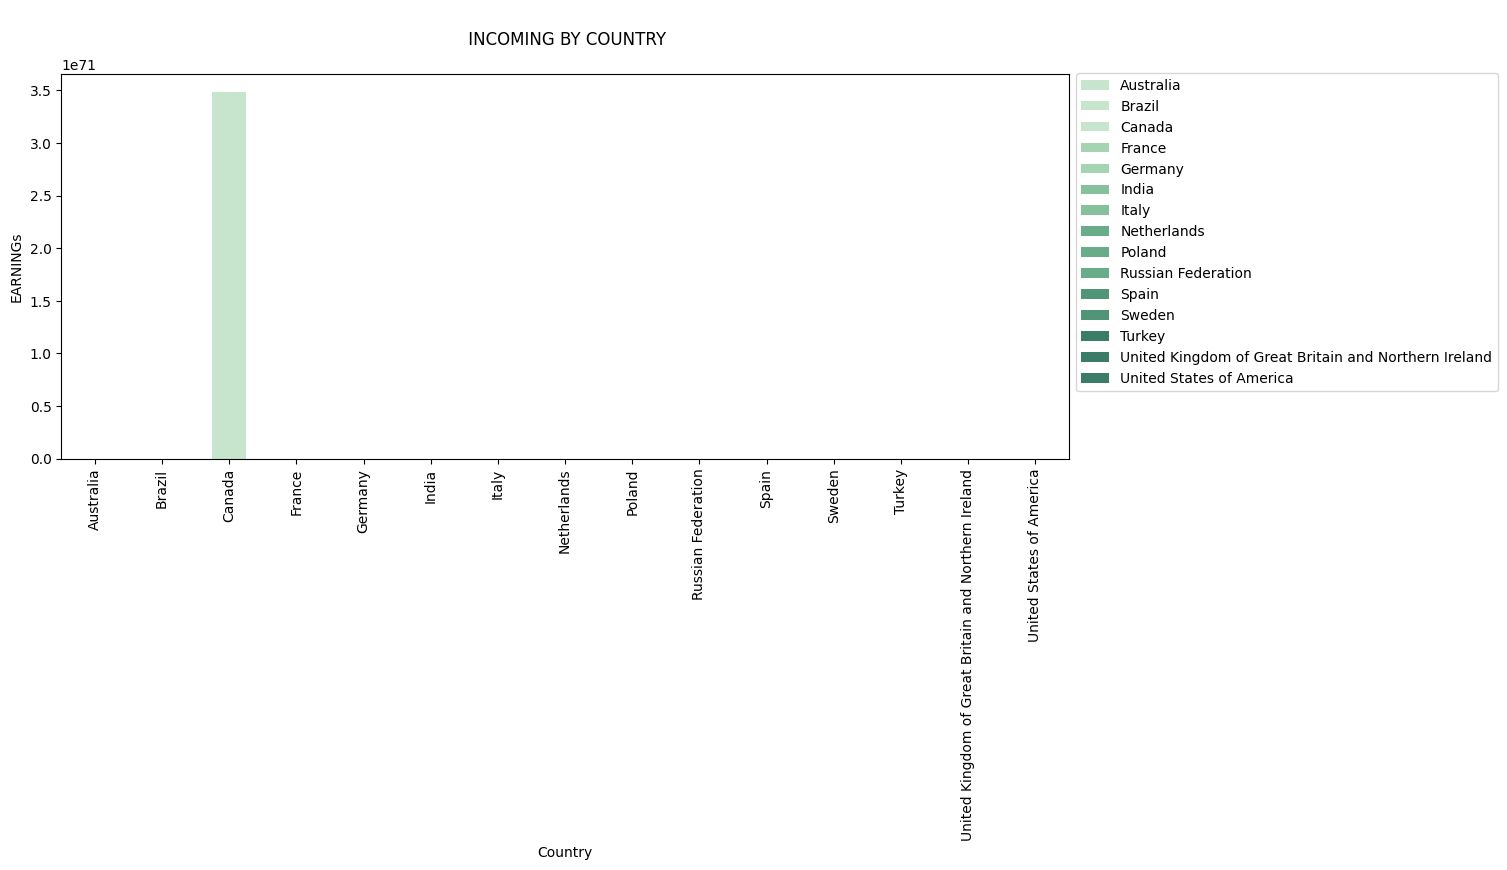

In [82]:
#top_countries_after_prepare=df_dev_full_time_drops_miss_rows.Country.value_counts().head(10).index
#top_countries_after_prepare


##############################


top_countries_after_prepare = list(df_dev_full_time_drops_miss_rows['Country'].value_counts().head(15).index)




#print(df_dev_full_time_drops_miss_rows[df_dev_full_time_drops_miss_rows['Country'].isin(top_countries_after_prepare)].head(100))


filtered_developer_data = df_dev_full_time_drops_miss_rows[df_dev_full_time_drops_miss_rows['Country'].isin(top_countries_after_prepare)]

df_dev_full_time_drops_miss_rows.info()

# Aggregate the data so we can visualize it later
#aggregated_data = filtered_developer_data.groupby(['Country'])['Respondent']

aggregated_data = filtered_developer_data.groupby(['Country','CompTotal'], as_index=False)['ResponseId'].count()


# Add column percentage
total_respondents_per_country = filtered_developer_data['Country'].value_counts()
print(total_respondents_per_country)
aggregated_data['Respondent Percentage'] = aggregated_data.apply(lambda x: x['ResponseId'] / total_respondents_per_country[x['Country']], axis=1).round(3)


aggregated_data = aggregated_data[['Country', 'CompTotal']]
#pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Country', columns='Country')
pivoted_data = pd.pivot_table(aggregated_data, values='CompTotal', index='Country', columns='Country')


pivoted_data.plot(kind='bar',stacked=True,colormap=ListedColormap(sns.color_palette("ch:2.5,-.2,dark=.4")),figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('EARNINGs')
plt.title('\n INCOMING BY COUNTRY\n')
plt.show()


# Pivot the data
#aggregated_data = aggregated_data[['Country', 'JobSat', 'Respondent Percentage']]
#pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Country', columns='JobSat').sort_values('Very satisfied', ascending=False)


##############################
##############################

#top_20_countries = list(developer_data['Country'].value_counts().head(20).index)
#filtered_developer_data = developer_data[developer_data['Country'].isin(top_20_countries)]

# Aggregate the data so we can visualize it later
#aggregated_data = filtered_developer_data.groupby(['Country','JobSat'], as_index=False)['Respondent'].count()

# Add column percentage
#total_respondents_per_country = filtered_developer_data['Country'].value_counts()

#ggregated_data['Respondent Percentage'] = aggregated_data.apply(lambda x: x['Respondent'] / total_respondents_per_country[x['Country']], axis=1).round(3)

# Pivot the data
#aggregated_data = aggregated_data[['Country', 'JobSat', 'Respondent Percentage']]
#pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Country', columns='JobSat').sort_values('Very satisfied', ascending=False)

###############################






#format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}', 'machine learning':'{:.2%}'}
format_dict = { 'CompTotal':'{:.2f}'}



#Aplicamos el estilo en la visualización



#df_dev_full_time_no_nulls.head(10).style.format(format_dict).background_gradient(subset=['Country', 'ComptTotal'], cmap='BuGn').highlight_max(color='yellow')
#df_dev_full_time_no_nulls.head(10).style.background_gradient(subset=['Country', 'CompTotal'])

#df_dev_full_time_no_nulls.head(10).style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')


#df_dev_full_time_no_nulls.head().style.format(format_dict).background_gradient(subset=['Country', 'ComptTotal'])



#df_dev_full_time_no_nulls.head().style.format(format_dict).bar(color='red', subset=['Country', 'ComptTotal'])
#df_dev_full_time_no_nulls.head(10).style.format(format_dict).background_gradient(subset=['Country', 'Employment'], cmap='BuGn').highlight_max(color='yellow')










In [108]:
# Conversion currencies

def currency_convertor(row,new_currency):   
    amount = row['CompTotal']

    curr = row['Cur']
   
    new_curr = c.convert(amount,curr,new_currency)
    

    return new_curr



#df.loc[df.currency != 'GBP', 'col1'] = convert_currency(currency_data.col1, df.col2
                                                                                  



#df_dev_full_time_drops_miss_rows['new_currency'] = df_dev_full_time_drops_miss_rows.apply(lambda x: currency_convertor(x),axis=1)
#df_dev_full_time_drops_miss_rows['new_currency'] = df_dev_full_time_drops_miss_rows.apply(c.convert(222,'EUR','USD'))

#df_dev_full_time_drops_miss_rows['new_currency'] = df_dev_full_time_drops_miss_rows.apply(currency_convertor(222,'USD'))
#df_dev_full_time_drops_miss_rows['new_currency'] = df_dev_full_time_drops_miss_rows.apply(c.convert(100, 'EUR', 'USD'))

#df_dev_full_time_drops_miss_rows = df_dev_full_time_drops_miss_rows.astype({'new_currency':'string'})



#df_dev_full_time_drops_miss_rows[df_dev_full_time_drops_miss_rows.Country=='Spain']
df_dev_full_time_drops_miss_rows


#OKdf_dev_full_time_drops_miss_rows['new_currency'] =df_dev_full_time_drops_miss_rows.apply(lambda x : c.convert(x.CompTotal, 'EUR', 'USD'),axis=1)
#df_dev_full_time_drops_miss_rows['new_currency_USD'] = df_dev_full_time_drops_miss_rows.apply(lambda x: currency_convertor(x,'USD'), axis=1)



#no_nulls = set(df_dev_full_time_drops_miss_rows.columns[df_dev_full_time_drops_miss_rows.isnull().mean()>0])


df_dev_full_time_drops_miss_rows.head(100).style.format(format_dict).background_gradient(cmap = 'Blues')



,ResponseId,Country,Currency,EdLevel,Gender,Age,YearsCode,CompTotal,OpSys,DevType,new_currency


United States of America                                8365
India                                                   3357
Germany                                                 2474
United Kingdom of Great Britain and Northern Ireland    2359
Canada                                                  1444
                                                        ... 
Guyana                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Monaco                                                     1
Burundi                                                    1
Name: Country, Length: 164, dtype: int64


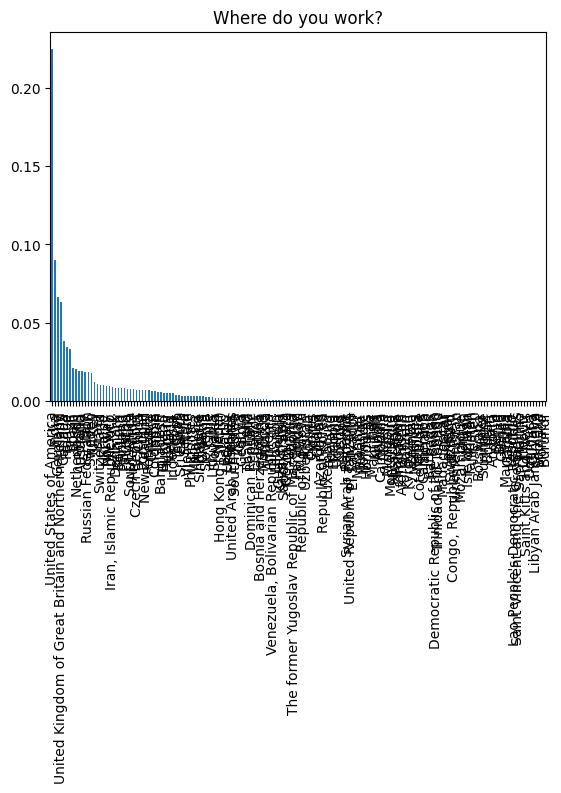

In [8]:
# Filter the data so that it only contains the survey result from top 10 countries based on the number of total respondents
list_top_countries = list(df_dev_full_time_drops_miss_rows['Country'].value_counts().head(15).index)




# Select only the countries in our previous list
filtered_developer_data = df_dev_full_time_drops_miss_rows[df_dev_full_time_drops_miss_rows['Country'].isin(list_top_countries)]

filtered_developer_data.head()

# Aggregate the data so we can visualize it later
GroupbyCountryCompTotal = filtered_developer_data.groupby(['Country','CompTotal'], as_index=False)['ResponseId'].count()




#pivoted_data = pd.pivot_table(GroupbyCountryCompTotal, index='Country', columns='CompTotal').sort_values()


#GroupbyCountryCompTotal.head()

# Pivot the data





#(status_vals/df.shape[0]).plot(kind="bar");
                                                  
#plt.title("What kind of developer are you?");
# sns.heatmap(df.corr(), annot=True, fmt=".2f");
                                                  
#null=df_dev_full_time.CompTotal.isnull().sum()
#print('sum nulls CompTotal before drop ',null)
                                                  
      
#     https://pandas.pydata.org/pandas-docs/stable/style.html


        

       

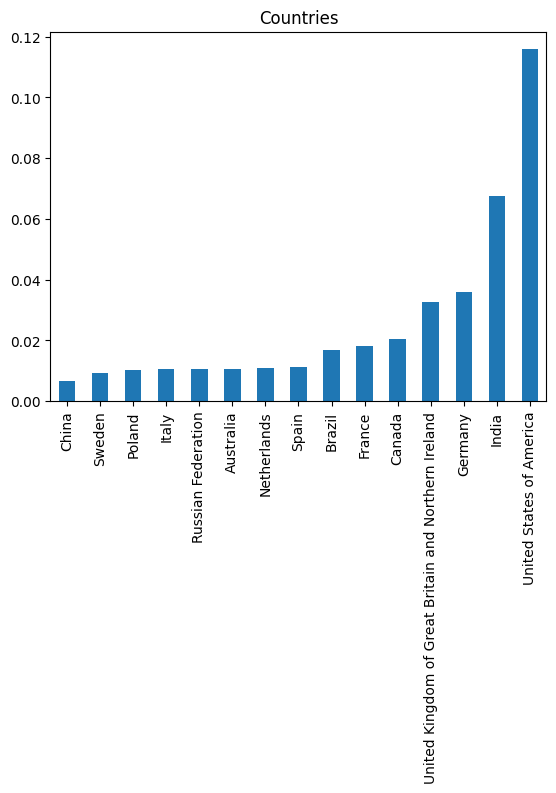

In [258]:
 GroupbyCountryCompTotal = GroupbyCountryCompTotal[['Country', 'CompTotal']]
pivoted_data = pd.pivot_table(GroupbyCountryCompTotal, index='Country', columns='CompTotal')



#Plot

# Visualize the data
# Visualize the data
#table.plot(kind='bar',stacked=True,colormap=ListedColormap(sns.color_palette("ch:2.5,-.2,dark=.3")),figsize=(13,5))
#plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
#plt.ylabel('Earnings Percentages')
#plt.title('\n Earnings  PERCENTAGE BY COUNTRY\n')
#plt.show()

                                                         
########
                                                  
values_Countries =filtered_developer_data.Country.value_counts(ascending=True) #Provide a pandas series of the counts for each countries status

values_Countries.head()


# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(values_Countries/df.shape[0]).plot(kind="bar");

plt.title("Countries");
#######                                                
                 